In [1]:
using GynC
import GynC: Sampling
using Plots

    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /home/numerik/bzfsikor/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.DataArray, AbstractArray) at /home/numerik/bzfsikor/.julia/v0.4/DataArrays/src/operators.jl:276.
To fix, define 
    +(DataArrays.DataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.
    +(AbstractArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury) at /home/numerik/bzfsikor/.julia/v0.4/WoodburyMatrices/src/SymWoodburyMatrices.jl:106
is ambiguous with: 
    +(DataArrays.AbstractDataArray, AbstractArray) at /home/numerik/bzfsikor/.julia/v0.4/DataArrays/src/operators.jl:300.
To fix, define 
    +(DataArrays.AbstractDataArray{T<:Any, 2}, WoodburyMatrices.SymWoodbury)
before the new definition.


In [2]:
dir = "/nfs/datanumerik/bzfsikor/batch/prop"
fs = filter(n->contains(n, "jld"), readdir(dir))
ss = map(f->joinpath(dir, f) |> GynC.load, fs)
ss = reshape(ss,2,5)

2x5 Array{GynC.Sampling,2}:
 Sampling
  samples: (100000,116)
  uniques: 71616
  config:  Config:
 patient: l1
 sigma:   0.1
 propvar trace: 0.00033981209046252456
 adapt:   false
 thin:    1
 init:    4858380976513133059
 prior:   Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}}  …  Sampling
  samples: (100000,116)
  uniques: 39
  config:  Config:
 patient: l1
 sigma:   0.1
 propvar trace: 3.3981209046252454
 adapt:   false
 thin:    1
 init:    4858380976513133059
 prior:   Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}} 
 Sampling
  samples: (100000,116)
  uniques

[Plots.jl] Initializing backend: pyplot



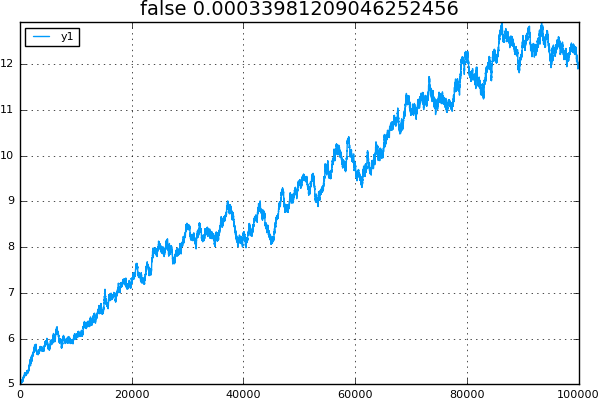


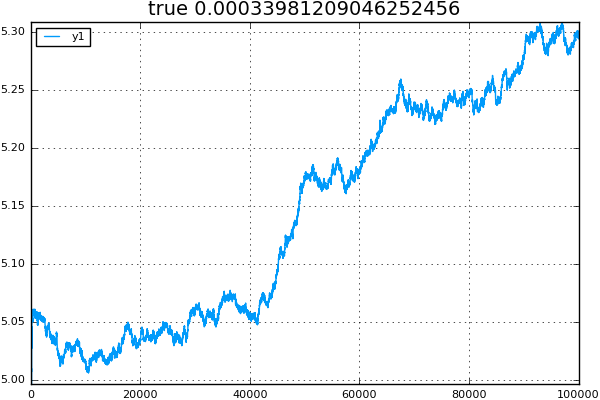


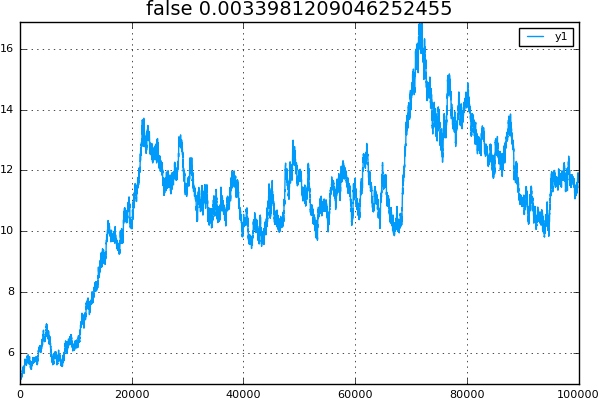


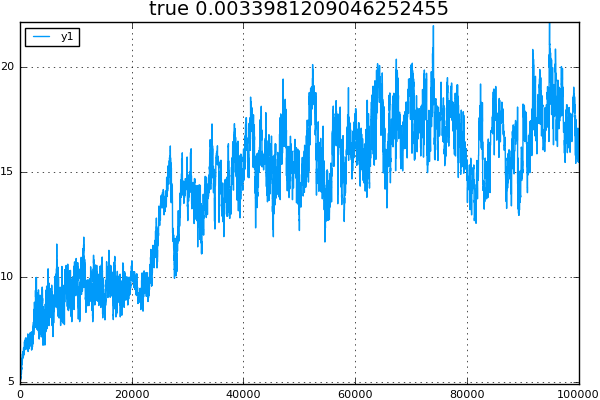


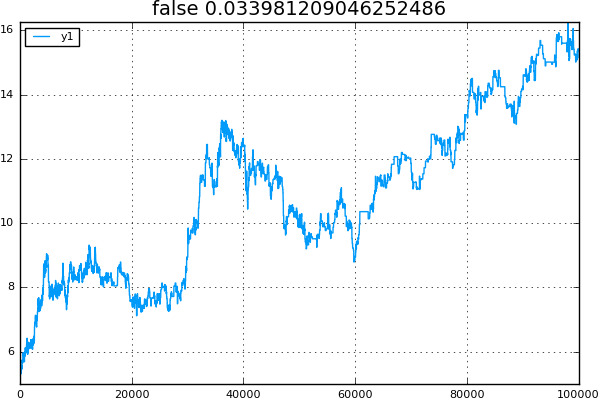


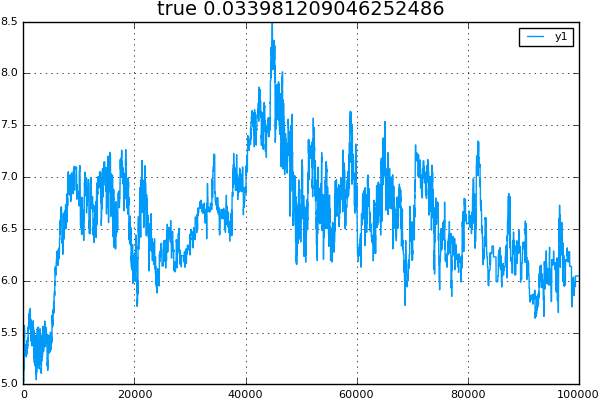


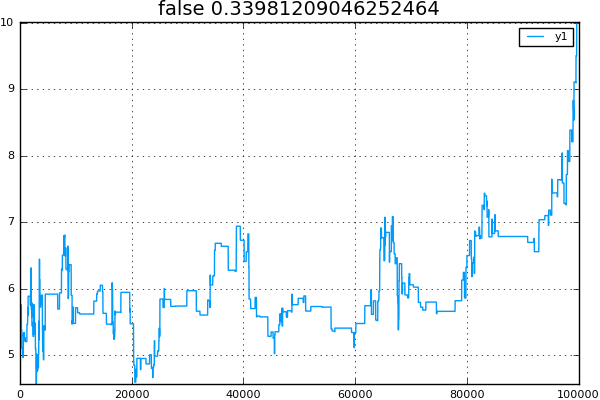


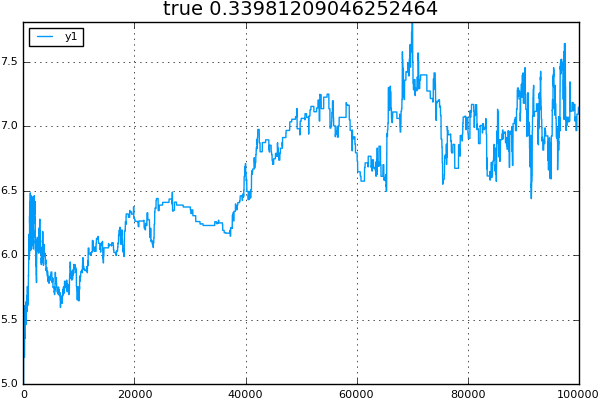


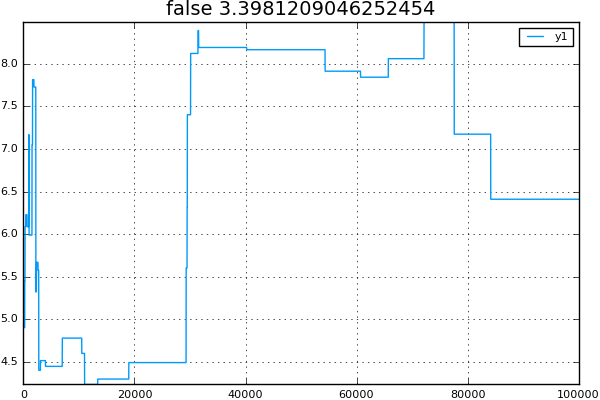


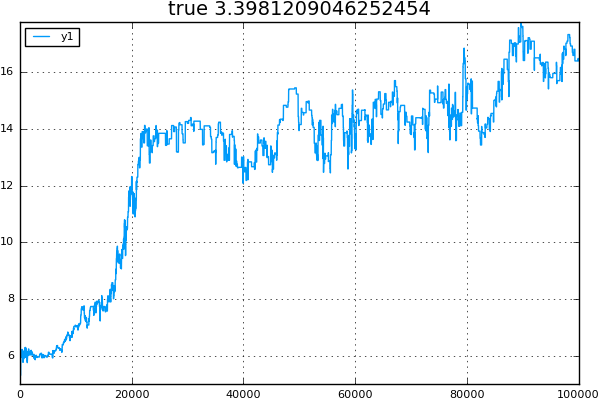

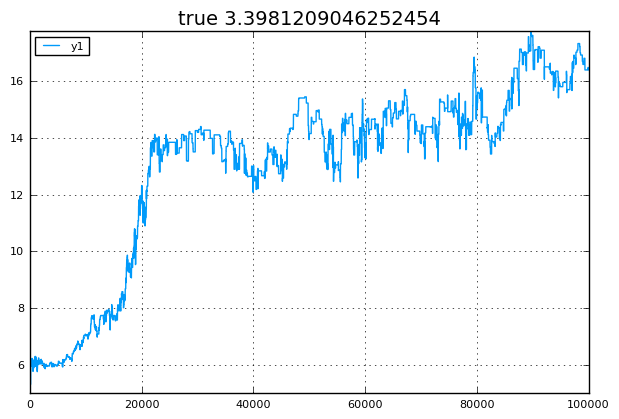

2x5 Array{Void,2}:
 nothing  nothing  nothing  nothing  nothing
 nothing  nothing  nothing  nothing  nothing

In [3]:
map(s->plot(s.samples[:,8], title = "$(s.config.adapt) $(s.config.propvar|>trace)")|>display, ss)

In [11]:
map(s->unique(s.samples[:,1])|>length, ss)

2x5 Array{Int64,2}:
 71616  38778  2594   380    39
 91744  12639  6898  1688  1325

In [12]:
# log|>cov|>trace * const,  measure of chain cov
map(s->GynC.proposal(s)|>trace, ss)

2x5 Array{Float64,2}:
 0.33182      0.948352  0.672697  0.470935   0.469374
 0.000814048  0.403525  0.478894  0.0896862  0.426036

In [13]:
invchol(x) = x * x'
map(s->s.variate.tune.SigmaL|>invchol|>trace,ss)

2x5 Array{Float64,2}:
 0.000339812  0.00339812  0.0339812  0.339812  3.39812
 0.000339812  0.00339812  0.0339812  0.339812  3.39812

In [14]:
map(s->s.variate.tune.SigmaLm|>invchol|>trace,ss)

2x5 Array{Float64,2}:
 0.0  0.0       0.0       0.0        0.0    
 0.0  0.403544  0.478911  0.0897173  0.42607

  1.853779 seconds (1.94 M allocations: 773.784 MB, 30.74% gc time)



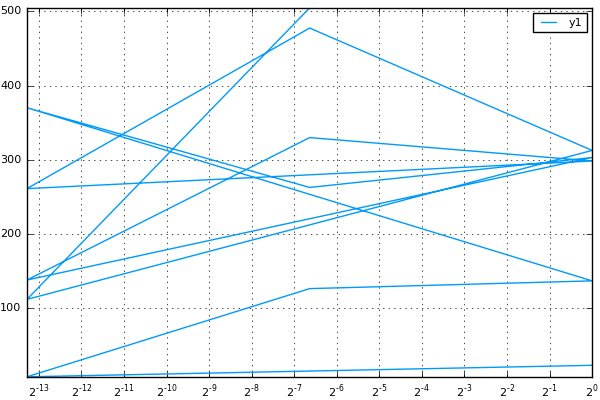

In [13]:
pyplot()
scalefirstrow(m) = m ./ m[1,:]
variation(m) = mapreduce(i->abs(m[i,:] - m[i+1,:]), +, 1:size(m,1)-1)

variations(ss) = map(s->s.samples |> scalefirstrow |> variation |> mean, ss)

#splitadapt = hcat(filter(s->s.config.adapt, ss), filter(s->!s.config.adapt, ss))
splitadapt = ss

@time plot(scalings(splitadapt), variations(splitadapt), xaxis=:log2)

In [17]:
scalings(ss)

15-element Array{Float64,1}:
 0.0100494  
 0.000100499
 1.0        
 0.0100494  
 0.000100499
 1.0        
 0.0100494  
 0.000100499
 1.0        
 0.0100494  
 0.000100499
 1.0        
 0.0100494  
 0.000100499
 1.0        

In [26]:
s=ss[1]

Sampling
  samples: (9000,116)
  uniques: 7097
  config:  Config:
 patient: l1
 sigma:   0.1
 proposal variance: 0.010049414618355118 x default trace, 9.999500033329732e-5 top left
 adapt:   true
 thin:    100
 init:    4858380976513133059
 prior:   Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}}

In [54]:
map(ss) do s
    (s.variate.tune.SigmaLm^2) |> diag |> x->x[116]
end

15-element Array{Float64,1}:
 -5.22415e-8 
 -3.9886e-7  
  9.2623e-6  
  2.25551e-6 
  4.79114e-9 
  9.08709e-6 
  6.21331e-7 
  2.0653e-8  
  4.65535e-6 
  1.02395e-6 
  1.89723e-9 
  3.71196e-6 
  8.29679e-8 
 -5.82613e-10
 -2.81895e-7 

In [16]:
ss |> variations

15-element Array{Float64,1}:
 504.73   
 112.118  
 312.724  
 477.547  
 261.302  
 298.464  
 330.042  
 138.173  
 303.185  
 262.886  
 370.252  
 137.063  
 126.605  
   7.85984
  23.3308 

  2.036709 seconds (793.97 k allocations: 138.805 MB, 4.78% gc time)



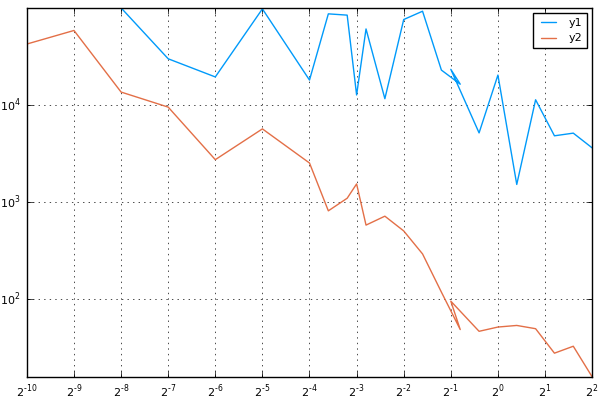

In [4]:
uniques(ss) = map(s->s.samples[:,1] |> unique |> length, ss)
@time plot(scalings(splitadapt), uniques(splitadapt), xaxis=:log2, yaxis=:log)

In [13]:
using Colors
function divcolors(n)
    nn = div(n, 2)
    vcat(colormap("reds", nn), colorant"black", reverse(colormap("blues", n-nn-1)))
end

function colorrange(d) 
    n = 100
    c = divcolors(100)
    shifted = (d - minimum(d))
    reldata = shifted / maximum(shifted) # norm to 0-1
    ind = round(Int, reldata * (n-1)) + 1
    c[ind]
end

colorrange(ss::Array{GynC.Sampling}) = colorrange(map(rprop,ss))

rprop(ss) = map(s->s.config.propvar |> trace |> log2, ss)

rprop (generic function with 1 method)

In [14]:
rprop(s) = (s.config.propvar|>trace)/(GynC.defaultpropvar|>trace)
label(ss::Array{GynC.Sampling}) = map(ss) do s
    string(s.config.adapt ? "ad" : "no", " v", round((s.config.propvar|>trace)/(GynC.defaultpropvar|>trace) |> log2, 1))
end

label(ss)

48-element Array{ASCIIString,1}:
 "no v-10.0"
 "ad v-10.0"
 "no v-9.0" 
 "ad v-9.0" 
 "no v-8.0" 
 "ad v-8.0" 
 "no v-7.0" 
 "ad v-7.0" 
 "no v-6.0" 
 "ad v-6.0" 
 "no v-5.0" 
 "ad v-5.0" 
 "no v-4.0" 
 ⋮          
 "no v0.0"  
 "ad v0.0"  
 "no v0.4"  
 "ad v0.4"  
 "no v0.8"  
 "ad v0.8"  
 "no v1.2"  
 "ad v1.2"  
 "no v1.6"  
 "ad v1.6"  
 "no v2.0"  
 "ad v2.0"  

In [7]:
llh(s,step=1) = [GynC.llh(s.config, s.samples[i,:]|>vec) for i in 1:step:size(s.samples,1)]
llhs = map(s->llh(s, 10000), ss)


[CVODES WARNING]  CVode
  Internal t = 28.8702 and h = 1.29579e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 28.8702 and h = 1.29579e-15 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 28.8702 and h = 3.08865e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 28.8702 and h = 3.08865e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 28.8702 and h = 3.08865e-16 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 28.8702 and h = 3.43871e-17 are such that t + h = t on the next step. The solver will continue anyway.


[CVODES WARNING]  CVode
  Internal t = 28.8702 and h = 3.43871e-17 are such that t + h = t on the next step. The solver will continue a

48-element Array{Array{Float64,1},1}:
 [-1654.7,-98.6957,-98.5381,-98.9484,-96.7462,-104.025,-100.636,-91.1464,-86.5699,-83.5968] 
 [-1656.67,-669.62,-282.892,-199.057,-178.564,-153.963,-144.287,-140.645,-133.486,-133.277] 
 [-1666.22,-111.667,-91.6416,-36.3205,-23.4976,-27.7745,-24.038,-28.5634,-31.8389,-27.9286] 
 [-1665.75,-308.745,-137.214,-129.583,-126.547,-120.152,-118.121,-112.599,-113.906,-114.314]
 [-1651.2,-97.3051,-80.2634,-72.0102,-67.4208,-60.9342,-61.7647,-56.4487,-59.2466,-60.1996] 
 [-1666.21,-218.791,-172.347,-147.782,-140.11,-124.4,-116.613,-119.426,-123.078,-120.574]   
 [-1657.09,-95.9019,-83.2484,-68.9252,-73.1979,-66.6021,-70.1105,-65.8658,-68.1597,-67.8596]
 [-1637.46,-124.267,-112.39,-118.509,-113.202,-109.377,-110.884,-110.962,-109.174,-110.993] 
 [-1624.34,-102.018,-98.7633,-97.5078,-99.4723,-97.6045,-97.1606,-99.0044,-95.5201,-94.4758]
 [-1615.76,-137.695,-114.921,-115.743,-116.939,-104.683,-106.89,-108.099,-104.346,-103.326] 
 [-1649.98,-110.206,-103.876,-10

In [15]:
plotlyjs()
plot(llhs, color=colorrange(ss)', label=label(ss)')

In [9]:
ssf = filter(s->log2(rprop(s)) < -2,ss)

24-element Array{GynC.Sampling,1}:
 Sampling
  samples: (100000,115)
  uniques: 42457
  config:  Config:
 patient: l1
 sigma:   0.1
 proposal variance: 0.0009765625 x default trace, 9.234216843708923e-6 top left
 adapt:   false
 thin:    10
 init:    4858380976513133059
 prior:   Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}}}       
 Sampling
  samples: (100000,115)
  uniques: 99996
  config:  Config:
 patient: l1
 sigma:   0.1
 proposal variance: 0.0009765625 x default trace, 9.234216843708923e-6 top left
 adapt:   true
 thin:    10
 init:    4858380976513133059
 prior:   Tuple{Array{Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},1},Distributions.MixtureModel{Distributions.Multivariate,Distributions.Continuous,Distributions.MvNormal{PDMat

In [16]:
plot(map(s->s.samples[1:10:end,8], ssf), color=colorrange(ssf)', label=label(ssf)')

In [11]:
lm = map(s->s.variate.tune.SigmaLm|>trace,ss)
l  = map(s->s.variate.tune.SigmaL |>trace, ss)

plot([lm l])

[Plots.jl] Initializing backend: plotlyjs
